In [6]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib created a temporary cache directory at C:\Users\Hp\AppData\Local\Temp\matplotlib-5tb6cssn because the default path (C:\Users\Hp\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [10]:
n_states = 16  
n_actions = 4  
goal_state = 15  

Q_table = np.zeros((n_states, n_actions))
learning_rate = 0.9
discount_factor = 0.98
exploration_prob = 0.25
epochs = 1000

In [11]:
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)  
    while current_state != goal_state:
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  
        else:
            action = np.argmax(Q_table[current_state])  

        next_state = (current_state + 1) % n_states

        reward = 1 if next_state == goal_state else 0

        Q_table[current_state, action] += learning_rate * \
            (reward + discount_factor *
             np.max(Q_table[next_state]) - Q_table[current_state, action])

        current_state = next_state

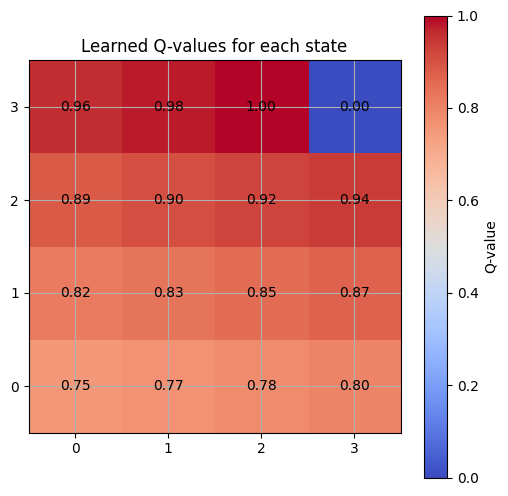

Learned Q-table:
[[0.75364194 0.75363441 0.7528883  0.74610552]
 [0.76902239 0.76902238 0.7690147  0.76902231]
 [0.78471672 0.78471672 0.78471672 0.78471672]
 [0.80073135 0.80073135 0.80073135 0.80073135]
 [0.81707281 0.81707281 0.81707281 0.81707281]
 [0.83374776 0.83374776 0.83374776 0.83374776]
 [0.85076302 0.85076302 0.85076302 0.85076302]
 [0.86812553 0.86812553 0.86812553 0.86812553]
 [0.88584238 0.88584238 0.88584238 0.88584238]
 [0.9039208  0.9039208  0.9039208  0.9039208 ]
 [0.92236816 0.92236816 0.92236816 0.92236816]
 [0.941192   0.941192   0.941192   0.941192  ]
 [0.9604     0.9604     0.9604     0.9604    ]
 [0.98       0.98       0.98       0.98      ]
 [1.         1.         1.         1.        ]
 [0.         0.         0.         0.        ]]


In [13]:
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4)) 

# Plot the grid of Q-values
plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()  # To match grid layout
plt.grid(True)

# Annotating the Q-values on the grid
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

# Print learned Q-table
print("Learned Q-table:")
print(Q_table)